<a href="https://colab.research.google.com/github/Kyung-Min-Na/2023_DeepLearning/blob/main/ML_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google drive connect

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 음원추출
기본 베이스 코드

In [24]:
import os
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

44100
1434240
32.522448979591836


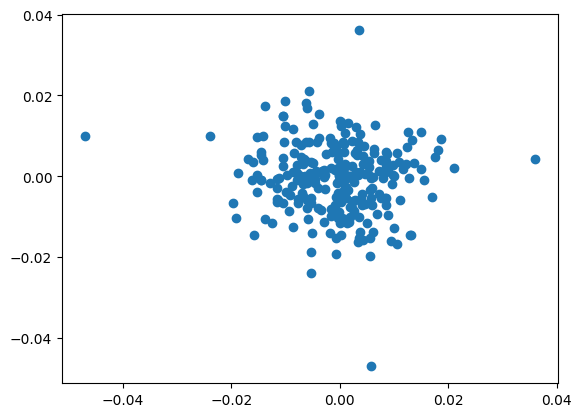

In [16]:
# 음원을 가져옴
audio_path = "/content/drive/MyDrive/Colab Notebooks/Sound/Train/1.비/S-210825_N_101_D_011_0001.mp3"
audio_signal, audio_sample_rate = librosa.load(audio_path, sr=None)

# 확인 코드
print(audio_sample_rate)
print(len(audio_signal))
print(len(audio_signal) / audio_sample_rate)

# 음성을 자름, 3초씩 (8초 이후부터 사용)
signal_start_time = 8  # 사용할 구간의 시작 시간을 설정
signal = audio_signal[int(signal_start_time * audio_sample_rate):int((signal_start_time + 3) * audio_sample_rate)]

# 샘플링하여 산점도 그리기
signalX = signal[:-500:500]
signalY = signal[500::500]

# 저장할 이미지의 경로 설정 (Trainpng 경로:/content/drive/MyDrive/Colab Notebooks/Sound/Trainpng)
notebook_directory = "/content/drive/MyDrive/Colab Notebooks/Sound/Trainpng"
os.makedirs(notebook_directory, exist_ok=True)

# 이미지 파일명 설정 (원본 데이터 파일명 사용)
original_filename = os.path.basename(audio_path).replace('.mp3', '')
image_filename = f"{original_filename}.png"

# 이미지의 전체 경로
save_path = os.path.join(notebook_directory, image_filename)

# 그래프 그리기
plt.scatter(signalX, signalY)
plt.savefig(save_path, dpi=60)
plt.show()

# 경민 작성코드

In [21]:
# 음원이 있는 디렉토리 경로
audio_directory = "/content/drive/MyDrive/Colab Notebooks/Sound/Validation/2.우박"


# 디렉토리 내 모든 음원 파일에 대해 반복
for filename in os.listdir(audio_directory):
    if filename.endswith(".mp3"):
        # 음원을 가져옴
        audio_path = os.path.join(audio_directory, filename)
        audio_signal, audio_sample_rate = librosa.load(audio_path, sr=None)

        # 음성을 자름, 3초씩 (8초 이후부터 사용)
        signal_start_time = 8  # 사용할 구간의 시작 시간을 설정
        signal = audio_signal[int(signal_start_time * audio_sample_rate):int((signal_start_time + 3) * audio_sample_rate)]

        # 샘플링하여 산점도 그리기
        signalX = signal[:-500:500]
        signalY = signal[500::500]

        # 저장할 이미지의 경로 설정
        notebook_directory = "/content/drive/MyDrive/Colab Notebooks/Sound/Image/Image(Validation_우박)"
        os.makedirs(notebook_directory, exist_ok=True)

        # 이미지 파일명 설정 (원본 데이터 파일명 사용)
        original_filename = os.path.basename(audio_path).replace('.mp3', '')
        image_filename = f"{original_filename}.png"

        # 이미지의 전체 경로
        save_path = os.path.join(notebook_directory, image_filename)

        # 그래프 그리기
        plt.scatter(signalX, signalY)
        plt.savefig(save_path, dpi=60)
        plt.close()  # 그래프 초기화


# CNN

In [23]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Sound/Image'

train_dir = os.path.join(base_dir, '/content/drive/MyDrive/Colab Notebooks/Sound/Image/Train')
validation_dir = os.path.join(base_dir, '/content/drive/MyDrive/Colab Notebooks/Sound/Image/Validation')

# 훈련에 사용되는 비/우박 이미지 경로
train_rain_dir = os.path.join(train_dir, 'Image(Train_비)')
train_snow_dir = os.path.join(train_dir, 'Image(Train_우박)')

# 테스트에 사용되는 비/우박 이미지 경로
validation_rain_dir = os.path.join(validation_dir, 'Image(Validation_비)')
validation_snow_dir = os.path.join(validation_dir, 'Image(Validation_우박)')

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

# 최신 버전에 맞게 옵티마이저 변경
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=optimizer,
            loss='binary_crossentropy',
            metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode='binary',
                                                       target_size=(150, 150))

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=50,
                    epochs=50,
                    validation_steps=20,
                    verbose=2)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)       

50/50 - 30s - loss: 0.7578 - accuracy: 0.6667 - val_loss: 0.6149 - val_accuracy: 0.6952 - 30s/epoch - 606ms/step
